In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import nibabel as nib
from skimage import transform

# Remove Control Points Not On Hist

In [2]:
def load_histology(filepath):
    """Loads the histology as a grayscale 2D float32 array of range [0, 1]"""
    hist = cv2.imread(filepath, cv2.IMREAD_UNCHANGED)
    if len(hist.shape) == 3:
        hist =  cv2.cvtColor(hist, cv2.COLOR_BGR2GRAY) # 2D uint8
    return (hist / 255.0).astype(np.float32)

In [3]:
def load_mri(filepath):
    """Loads MRI nii file returns a 2D float 32 array of range [0, 1]"""
    mri = nib.load(filepath).get_fdata()
    temp = mri - np.min(mri)
    return (temp / (1 if np.max(temp) == 0 else np.max(temp))).astype(np.float32)

In [4]:
def get_leaf_dirs(dir):
    '''
    @param dir: The parent directory to recursively search
    returns: A list of paths to all leaf directories
    '''
    return [dirpath for dirpath, dirnames, filenames in os.walk(dir) if not dirnames]

In [5]:
def is_valid_point(point, image, radius=3):
    window_sum = np.sum(image[point[0]-radius:point[0]+radius+1, point[1]-radius:point[1]+radius+1])
    return window_sum > 0.1

In [6]:
def process_folder_moving(folder, should_plot=False):
    try:
        points = pd.read_csv(os.path.join(folder, "histmri_controlPoints.csv"), header=None).to_numpy().astype(int)
    except:
        print("failed to read points:", folder)
        return
        
    try:
        mri = load_mri(os.path.join(folder, "mri_slice_double_T2_norm.nii"))
    except:
        print("failed to read mri:", folder)
        return
    
    try:
        try:
            histology = load_histology(os.path.join(folder, "small_recon_8_pgt_sharp.tiff"))
        except:
            histology = load_histology(os.path.join(folder, "small_recon_8_pgt_fuzzy.tiff"))
    except:
        print("failed to read histology", folder)
        return
        
    
    hist_points = np.flip(points[:, :2], axis=-1)
    mri_points = np.flip(points[:, 2:], axis=-1)
    
    # Get Filter Indices
    keep_list = []
    for i in range(len(points)):
        is_valid = is_valid_point(hist_points[i], histology) and is_valid_point(mri_points[i], mri)
        keep_list.append(is_valid)
        
    keep_list = np.array(keep_list)
    num_removed = np.sum(keep_list == False)
    filtered_points = points[keep_list]
    
    if num_removed > 0 and should_plot:
        fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
        ax[0][0].imshow(histology, cmap="gray")
        ax[0][0].scatter(points[:, 0], points[:, 1])
        ax[0][1].imshow(histology, cmap="gray")
        ax[0][1].scatter(filtered_points[:, 0], filtered_points[:, 1])
        ax[1][0].imshow(mri, cmap="gray")
        ax[1][0].scatter(points[:, 2], points[:, 3])
        ax[1][1].imshow(mri, cmap="gray")
        ax[1][1].scatter(filtered_points[:, 2], filtered_points[:, 3])
        fig.suptitle("Total {0} Points Removed".format(num_removed))
        fig.savefig(os.path.join(folder, "filtered_point_QC.png"))
        
    np.savetxt(os.path.join(folder, "filtered_points.csv"), filtered_points.astype(int), delimiter=",")

    return filtered_points

### Run

In [7]:
all_slides = get_leaf_dirs("/data/ur/bukowy/LaViolette_Data/Prostates/")

In [8]:
print(len(all_slides))

400


In [9]:
for slide in all_slides:  
    process_folder_moving(slide)

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


failed to read histology /data/ur/bukowy/LaViolette_Data/Prostates/1101/6
failed to read histology /data/ur/bukowy/LaViolette_Data/Prostates/1101/9
failed to read histology /data/ur/bukowy/LaViolette_Data/Prostates/1101/7
failed to read histology /data/ur/bukowy/LaViolette_Data/Prostates/1101/8


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


failed to read mri: /data/ur/bukowy/LaViolette_Data/Prostates/1105/10
failed to read mri: /data/ur/bukowy/LaViolette_Data/Prostates/1105/12
failed to read mri: /data/ur/bukowy/LaViolette_Data/Prostates/1105/13
failed to read mri: /data/ur/bukowy/LaViolette_Data/Prostates/1105/14
failed to read mri: /data/ur/bukowy/LaViolette_Data/Prostates/1105/15
failed to read mri: /data/ur/bukowy/LaViolette_Data/Prostates/1105/19
failed to read mri: /data/ur/bukowy/LaViolette_Data/Prostates/1106/8


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1107/12
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1107/13
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1107/5


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1108/11
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1108/12
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1108/13
failed to read mri: /data/ur/bukowy/LaViolette_Data/Prostates/1108/7
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1110/10


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1110/12
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1110/13
failed to read mri: /data/ur/bukowy/LaViolette_Data/Prostates/1110/5


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


failed to read histology /data/ur/bukowy/LaViolette_Data/Prostates/1111/9


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1111/5
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1112/18
failed to read mri: /data/ur/bukowy/LaViolette_Data/Prostates/1112/9
failed to read mri: /data/ur/bukowy/LaViolette_Data/Prostates/1112/11
failed to read mri: /data/ur/bukowy/LaViolette_Data/Prostates/1112/16
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1112/17
failed to read mri: /data/ur/bukowy/LaViolette_Data/Prostates/1112/10
failed to read mri: /data/ur/bukowy/LaViolette_Data/Prostates/1112/8
failed to read mri: /data/ur/bukowy/LaViolette_Data/Prostates/1112/15
failed to read mri: /data/ur/bukowy/LaViolette_Data/Prostates/1112/12
failed to read mri: /data/ur/bukowy/LaViolette_Data/Prostates/1112/13
failed to read mri: /data/ur/bukowy/LaViolette_Data/Prostates/1112/14


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1113/12


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1121/6
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1122/11


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


failed to read mri: /data/ur/bukowy/LaViolette_Data/Prostates/1115/9
failed to read mri: /data/ur/bukowy/LaViolette_Data/Prostates/1115/11
failed to read mri: /data/ur/bukowy/LaViolette_Data/Prostates/1115/7
failed to read mri: /data/ur/bukowy/LaViolette_Data/Prostates/1115/6
failed to read mri: /data/ur/bukowy/LaViolette_Data/Prostates/1115/10
failed to read mri: /data/ur/bukowy/LaViolette_Data/Prostates/1115/8
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1115/5
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1118/6


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1118/15
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1118/12
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1118/13
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1118/14
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/images_for_JB


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


failed to read histology /data/ur/bukowy/LaViolette_Data/Prostates/1128/13
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1128/14
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1128/6


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


failed to read histology /data/ur/bukowy/LaViolette_Data/Prostates/1129/10
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1129/11
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1129/5
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1129/6
failed to read histology /data/ur/bukowy/LaViolette_Data/Prostates/1129/7
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1131/10
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1131/11


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


failed to read histology /data/ur/bukowy/LaViolette_Data/Prostates/1131/9
failed to read histology /data/ur/bukowy/LaViolette_Data/Prostates/1132/11
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1132/13
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1132/14


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1123/11
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1123/12
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1123/5


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


failed to read histology /data/ur/bukowy/LaViolette_Data/Prostates/1133/10
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1133/11
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1133/12
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1133/13


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


failed to read histology /data/ur/bukowy/LaViolette_Data/Prostates/1133/9
failed to read histology /data/ur/bukowy/LaViolette_Data/Prostates/1134/10
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1134/7
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1134/8


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


failed to read histology /data/ur/bukowy/LaViolette_Data/Prostates/1134/9
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1136/10
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1136/11
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1136/12
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1136/13
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1136/14
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1136/15
failed to read histology /data/ur/bukowy/LaViolette_Data/Prostates/1136/7


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


failed to read histology /data/ur/bukowy/LaViolette_Data/Prostates/1137/10
failed to read histology /data/ur/bukowy/LaViolette_Data/Prostates/1137/11
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1137/5


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1124/13
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1124/5


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1125/12
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1125/5
failed to read mri: /data/ur/bukowy/LaViolette_Data/Prostates/1125/6


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1126/12
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1126/13
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1126/14
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1126/5


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


failed to read histology /data/ur/bukowy/LaViolette_Data/Prostates/1127/10
failed to read histology /data/ur/bukowy/LaViolette_Data/Prostates/1127/11
failed to read histology /data/ur/bukowy/LaViolette_Data/Prostates/1127/12
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1127/13
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1127/5
failed to read histology /data/ur/bukowy/LaViolette_Data/Prostates/1127/6
failed to read histology /data/ur/bukowy/LaViolette_Data/Prostates/1127/7
failed to read histology /data/ur/bukowy/LaViolette_Data/Prostates/1127/8
failed to read mri: /data/ur/bukowy/LaViolette_Data/Prostates/1127/9
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1138/10


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


failed to read histology /data/ur/bukowy/LaViolette_Data/Prostates/1138/6
failed to read histology /data/ur/bukowy/LaViolette_Data/Prostates/1138/7


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1140/14
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1140/15
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1140/16
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1140/17


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1141/10
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1141/11
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1141/12


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1141/9
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1142/5


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1144/11
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1144/12
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1144/13
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1144/5
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1144/6
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1144/8


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1147/15
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1147/5


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


failed to read histology /data/ur/bukowy/LaViolette_Data/Prostates/1148/10
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1148/11
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1148/12


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1149/10
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1149/11
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1149/12
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1149/13
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1149/5
failed to read histology /data/ur/bukowy/LaViolette_Data/Prostates/1149/6
failed to read histology /data/ur/bukowy/LaViolette_Data/Prostates/1149/8
failed to read histology /data/ur/bukowy/LaViolette_Data/Prostates/1149/9


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


failed to read histology /data/ur/bukowy/LaViolette_Data/Prostates/1152/11
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1152/12
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1152/13
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1152/5
failed to read histology /data/ur/bukowy/LaViolette_Data/Prostates/1152/8


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


failed to read histology /data/ur/bukowy/LaViolette_Data/Prostates/1152/9


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1154/14
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1154/15
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1154/5
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1154/6


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1155/13
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1155/14


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1158/15


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


failed to read histology /data/ur/bukowy/LaViolette_Data/Prostates/1159/12
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1159/13
failed to read points: /data/ur/bukowy/LaViolette_Data/Prostates/1159/14


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


failed to read mri: /data/ur/bukowy/LaViolette_Data/Prostates/1185/10
failed to read mri: /data/ur/bukowy/LaViolette_Data/Prostates/1185/11
failed to read mri: /data/ur/bukowy/LaViolette_Data/Prostates/1185/6
failed to read mri: /data/ur/bukowy/LaViolette_Data/Prostates/1185/7
failed to read mri: /data/ur/bukowy/LaViolette_Data/Prostates/1185/8
failed to read mri: /data/ur/bukowy/LaViolette_Data/Prostates/1185/9
failed to read mri: /data/ur/bukowy/LaViolette_Data/Prostates/1187/10
failed to read mri: /data/ur/bukowy/LaViolette_Data/Prostates/1187/11
failed to read mri: /data/ur/bukowy/LaViolette_Data/Prostates/1187/12
failed to read mri: /data/ur/bukowy/LaViolette_Data/Prostates/1187/13
failed to read mri: /data/ur/bukowy/LaViolette_Data/Prostates/1187/14
failed to read mri: /data/ur/bukowy/LaViolette_Data/Prostates/1187/5
failed to read mri: /data/ur/bukowy/LaViolette_Data/Prostates/1187/6
failed to read mri: /data/ur/bukowy/LaViolette_Data/Prostates/1187/7
failed to read mri: /data/u

In [10]:
lengths = []
for slide in all_slides:
    try:
        points = pd.read_csv(os.path.join(slide, "filtered_points.csv"))
        lengths.append(len(points))
    except:
        pass

In [11]:
len(lengths)

180

4469


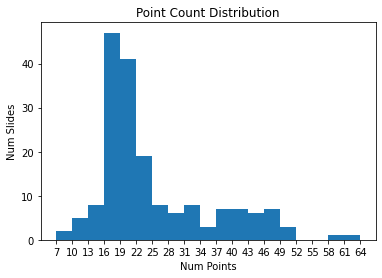

In [12]:
plt.hist(np.array(lengths).T, bins=range(min(lengths), max(lengths), 3))
plt.xticks(range(min(lengths), max(lengths), 3), range(min(lengths), max(lengths), 3))
plt.xlabel("Num Points")
plt.ylabel("Num Slides")
plt.title("Point Count Distribution")
print(np.sum(lengths))